In [38]:
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv('petrol_consumption.csv')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [40]:
data.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [42]:
X=data.drop(['Petrol_Consumption'],axis=1)
y=data[['Petrol_Consumption']]


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [46]:
treeclassifier=DecisionTreeRegressor()
param_grid = {
    'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2'] 
}
param_grid

{'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': [None, 'sqrt', 'log2']}

In [47]:
cv=KFold()
grid=GridSearchCV(estimator=treeclassifier,param_grid=param_grid,scoring='neg_mean_squared_error',cv=cv)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['poisson', 'absolute_error',
                                       'squared_error', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [48]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': None,
 'splitter': 'random'}

In [49]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=3, splitter='random')

In [50]:
y_pred=grid.predict(X_test)
y_pred

array([576.04      , 576.04      , 576.04      , 576.04      ,
       576.04      , 576.04      , 476.71428571, 799.66666667,
       576.04      , 576.04      ])

The r2 score for Decision Tree Regressor is  -0.3221192693355539


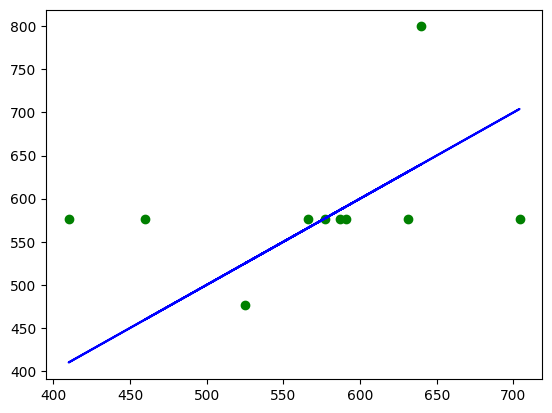

In [51]:
print("The r2 score for Decision Tree Regressor is ",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred,c='g')
plt.plot(y_test,y_test,'b')

In [52]:
def prediction_model(model):
    cv=KFold()
    model=model(cv=cv)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"The r2 score for {model} is {r2_score(y_test,y_pred)}")
    plt.scatter(y_test,y_pred,c='g')
    plt.plot(y_test,y_test,'b')

The r2 score for RidgeCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.38640916806219694


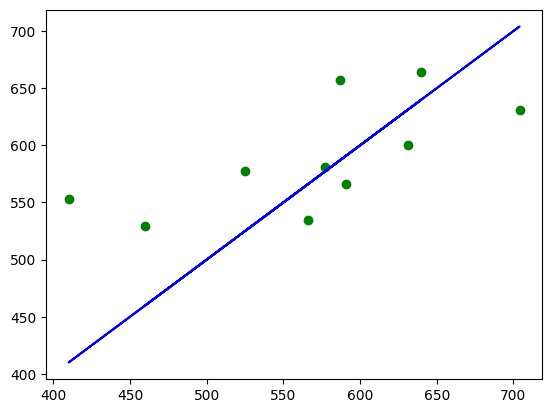

In [53]:
prediction_model(RidgeCV)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The r2 score for LassoCV(cv=KFold(n_splits=5, random_state=None, shuffle=False)) is 0.3919250260176389


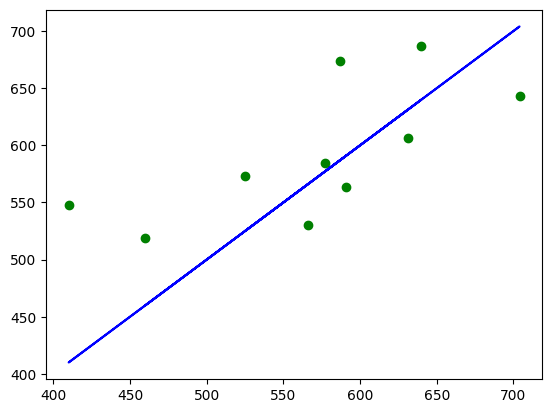

In [54]:
prediction_model(LassoCV)